In [12]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.set_printoptions(precision=3,suppress=True)


In [13]:
drive.mount('/content/drive')
with open('/content/drive/My Drive/Colab Notebooks/data/iris.csv', 'r') as f: 
  temp = np.genfromtxt(f,delimiter=',')

Mounted at /content/drive


In [14]:
# % Load iris data and then use the first feature as feature and the second feature as the response but limited to class #1
X = temp[temp[:,-1]==1,0]
y = temp[temp[:,-1]==1,1]
# Spliting into training/testing 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
Kr = len(X_train)
Kt = len(X_test)
X_train = X_train.reshape(Kr,1)
y_train = y_train.reshape(Kr,1)
X_test = X_test.reshape(Kt,1)
y_test = y_test.reshape(Kt,1)
print('samples in training: %i; testing datasets: %i'%(Kr,Kt))


samples in training: 35; testing datasets: 15


In [15]:
# Perform linear regression
# y = w0 + w1x1
reg = LinearRegression().fit(X_train,y_train)
# for easier reading np

print('intercept= ', reg.intercept_)
print('Slope (coefficients)=', reg.coef_)

# Predict response using the estiamted linear model
yhat = reg.predict(X_test)

intercept=  [-0.563]
Slope (coefficients)= [[0.792]]


In [16]:
# Evaluate the quality of linear regression
# R-square = 1 - sum of squares of residue error/ sum of squares of errors using mean(y) to predict y
# The larger the value of R-square (closer to 1), the better the linear model fit the data. 
residue = y_test - yhat
SS_res = residue.T @ residue # sum of square of prediction error 
SS_tot = np.sum(np.square((y_test-np.mean(y_test))) )# variance of the response 
R_sqr = 1 - (SS_res/SS_tot)

print('R_square_manual',R_sqr)
print('R_square_package',format(r2_score(y_test,yhat),".3f"))

R_square_manual [[0.5]]
R_square_package 0.500


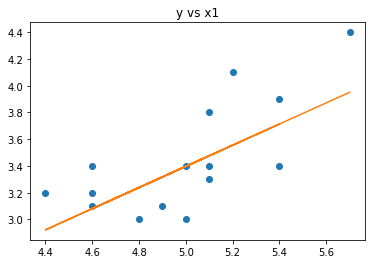

In [17]:
plt.plot(X_test,y_test ,"o", X_test,yhat,'-')
plt.title('y vs x1')
plt.show()

In [18]:
drive.flush_and_unmount()